In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance-premium-prediction/insurance.csv


In [2]:
insurance_premium_data = pd.read_csv('/kaggle/input/insurance-premium-prediction/insurance.csv')
insurance_premium_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
insurance_premium_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_premium_data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
all_columns = list(insurance_premium_data)
numerical_columns = ['age','bmi','children','expenses']
categorical_columns = [x for x in all_columns if x not in numerical_columns]
categorical_columns

['sex', 'smoker', 'region']

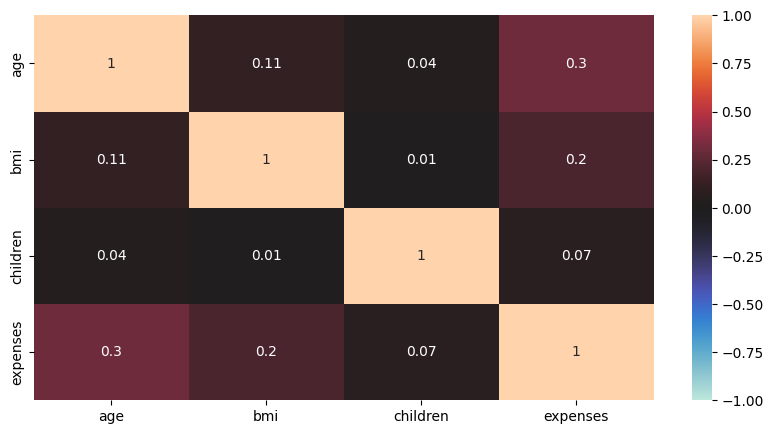

In [15]:
plt.figure(figsize=(10,5))

data_corr = round(insurance_premium_data[numerical_columns].corr(),2)
ax = sns.heatmap(data_corr,vmin=-1,vmax=1,center=0,annot=True)

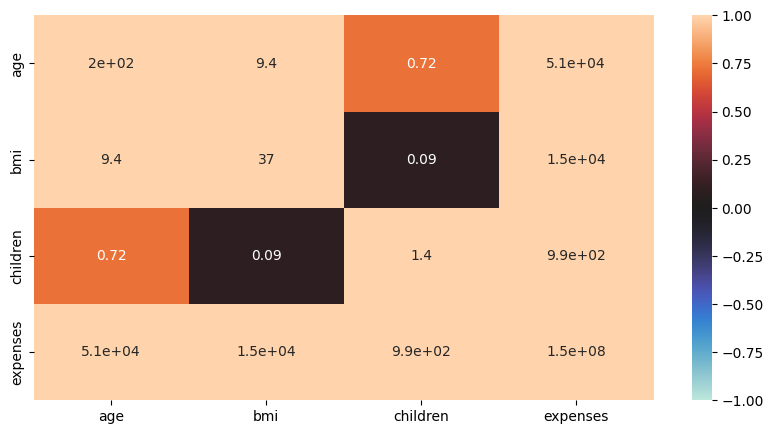

In [16]:
plt.figure(figsize=(10,5))

data_cov = round(insurance_premium_data[numerical_columns].cov(),2)
ax = sns.heatmap(data_cov,vmin=-1,vmax=1,center=0,annot=True)

In [17]:
one_hot_encoding = pd.get_dummies(insurance_premium_data[categorical_columns])
one_hot_encoding

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,True,False,False,True,False,False,False,True
1,False,True,True,False,False,False,True,False
2,False,True,True,False,False,False,True,False
3,False,True,True,False,False,True,False,False
4,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,False,True,True,False,False,True,False,False
1334,True,False,True,False,True,False,False,False
1335,True,False,True,False,False,False,True,False
1336,True,False,True,False,False,False,False,True


In [19]:
insurance_concat_data = pd.concat([insurance_premium_data[numerical_columns],one_hot_encoding],axis=1)
insurance_concat_data.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,True,False,False,True,False,False,False,True
1,18,33.8,1,1725.55,False,True,True,False,False,False,True,False
2,28,33.0,3,4449.46,False,True,True,False,False,False,True,False
3,33,22.7,0,21984.47,False,True,True,False,False,True,False,False
4,32,28.9,0,3866.86,False,True,True,False,False,True,False,False


In [27]:
insurance_concat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   expenses          1338 non-null   float64
 4   sex_female        1338 non-null   bool   
 5   sex_male          1338 non-null   bool   
 6   smoker_no         1338 non-null   bool   
 7   smoker_yes        1338 non-null   bool   
 8   region_northeast  1338 non-null   bool   
 9   region_northwest  1338 non-null   bool   
 10  region_southeast  1338 non-null   bool   
 11  region_southwest  1338 non-null   bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 52.4 KB


In [23]:
from sklearn.model_selection import train_test_split

X = insurance_concat_data.drop(columns=['expenses'])
Y= insurance_concat_data[['expenses']]

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [30]:
from sklearn.linear_model import LinearRegression

lm_model = LinearRegression()
lm_model.fit(X_train, Y_train)

LinearRegression()

In [31]:
Y_pred = lm_model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

mse = mean_squared_error(Y_pred,Y_test)
print("mse is ",round(mse,2))
mae = mean_absolute_error(Y_pred,Y_test)
print("mae is ",round(mae,2))
r2 = r2_score(Y_pred,Y_test)
print("r2 is ",round(r2,2))

mse is  35558807.61
mae is  4086.76
r2 is  0.67


In [37]:
print("Model intercept",lm_model.intercept_,"Model co-efficent",lm_model.coef_)

Model intercept [-23.6236008] Model co-efficent [[   250.01441093    318.70160794    393.97059493    156.28892973
    -156.28892973 -11604.41802328  11604.41802328    301.73715171
     294.4485017    -690.61521879     94.42956538]]


In [39]:
X.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [40]:
model_coeff = pd.DataFrame(data=lm_model.coef_.T, index = X.columns, columns=["Coefficients"])
model_coeff

,Coefficients
age,250.014411
bmi,318.701608
children,393.970595
sex_female,156.288930
sex_male,-156.288930
smoker_no,-11604.418023
smoker_yes,11604.418023
region_northeast,301.737152
region_northwest,294.448502
region_southeast,-690.615219
